**Classifying Muffins, Cupcakes and Scones with SVM**

__Step 1:__ Import Packages

In [1]:
# Import Packages for analysis
import os
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
import sklearn.preprocessing

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline


__Step 2:__ Import Data

In [28]:
# Read in muffin and cupcake ingredient data
recipes = pd.read_csv('recipes_muffins_cupcakes_scones.csv')
recipes.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


__Step 3:__ Prepare the Data

In [3]:
#Creating a type_numeric column for decision tree later. 

def type_num (row):
    if row ['Type'] == 'Cupcake':
        return 0
    if row['Type'] == 'Muffin':
        return 1
    else:
        return 2
recipes['type_num'] = recipes.apply (lambda row: type_num(row), axis=1)
recipes.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt,type_num
0,Muffin,55,28,3,7,5,2,0,0,1
1,Muffin,47,24,12,6,9,1,0,0,1
2,Muffin,47,23,18,6,4,1,0,0,1
3,Muffin,45,11,17,17,8,1,0,0,1
4,Muffin,50,25,12,6,5,2,1,0,1


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


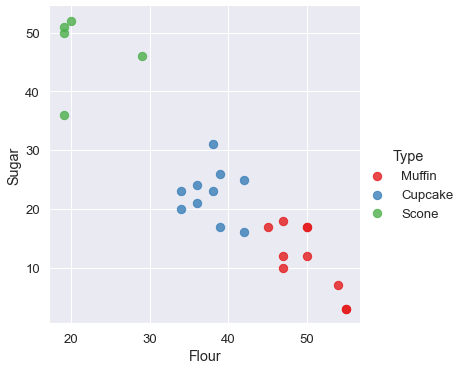

In [4]:
# Plot three ingredients
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [5]:
# Specify inputs for the model
# ingredients = recipes[['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']].as_matrix()
ingredients = recipes[['Flour','Sugar']].values
type_label = sklearn.preprocessing.LabelEncoder()
type_label.fit(recipes['Type'].values)

#Used for plotting/decision tree
type_label1 = recipes['type_num'].values

# Feature names
recipe_features = recipes.columns.values[1:].tolist()
recipe_features

['Flour',
 'Milk',
 'Sugar',
 'Butter',
 'Egg',
 'Baking Powder',
 'Vanilla',
 'Salt',
 'type_num']

__Step 4:__ Fit the Model

In [6]:
# Fit the SVM model
model = svm.SVC(kernel='linear', decision_function_shape='ovo')
model.fit(ingredients, type_label.transform(recipes['Type'].values))

SVC(decision_function_shape='ovo', kernel='linear')

__Step 5:__ Visualize Results

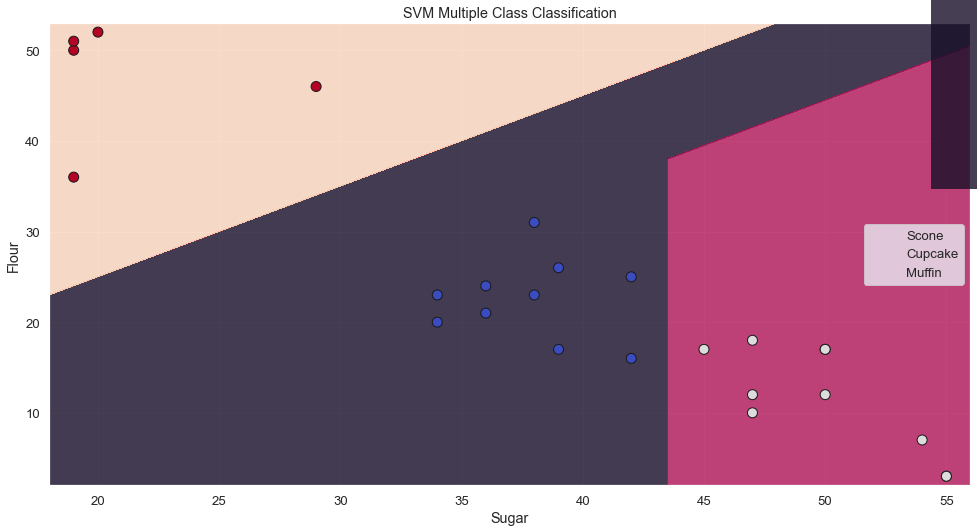

In [30]:
#Creating a mesh grid 

X = ingredients
y = type_label1
h = .02 
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
# The classification SVC model
model = svm.SVC(kernel='linear', decision_function_shape='ovr')
clf = model.fit(X, y)
fig, ax = plt.subplots()
fig.set_size_inches(16.5, 8.5)
# title for the plots
title = ("SVM Multiple Class Classification")
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
CS = plot_contours(ax, clf, xx, yy, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=100, edgecolors="k")
labels = ['Scone', 'Cupcake','Muffin']
for i in range(len(labels)):
    CS.collections[i].set_label(labels[i])
ax.legend(loc="right")
ax.set_ylabel("Flour")
ax.set_xlabel("Sugar")
ax.set_title(title)

plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


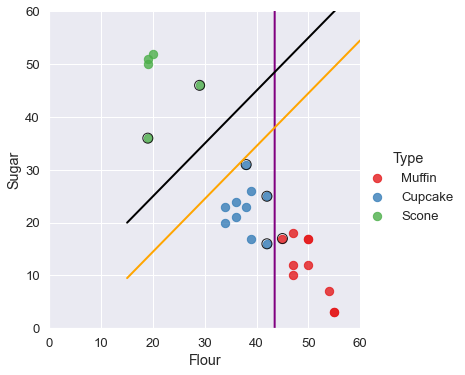

In [8]:
# Get the separating hyperplane
offset = 0
colors = ('purple', 'black', 'orange')
formats = ('---', '-.', '.')

# Plot the hyperplane
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.axis([0, 60, 0, 60])

#draw circles around support vectors
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

for i in range(len(model.classes_)):

    w = model.coef_[i]
    a = -w[0] / w[1]
    xx = np.linspace(15, 60)
    yy = a * xx - (model.intercept_[i]) / w[1]

    plt.plot(xx, yy, linewidth=2, color=colors[i])

    num_sv = model.n_support_[i]

if i == 0:
    b = model.support_vectors_[0]
    yy_down = a * xx + (b[1] - a * b[0])
    plt.plot(xx, yy, linewidth=2, color=colors[i])
    
    b = model.support_vectors_[3]
    yy_down = a * xx + (b[1] - a * b[0])
    plt.plot(xx, yy, linewidth=2, color=colors[i])
    
elif i == 1:
    b = model.support_vectors_[2]
    yy_down = a * xx + (b[1] - a * b[0])
    plt.plot(xx, yy, linewidth=2, color=colors[i])
    
    b = model.support_vectors_[4]
    yy_down = a * xx + (b[1] - a * b[0])
    plt.plot(xx, yy, linewidth=2, color=colors[i])
    
elif i == 1:
    b = model.support_vectors_[1]
    yy_down = a * xx + (b[1] - a * b[0])
    plt.plot(xx, yy, linewidth=2, color=colors[i])
    
    b = model.support_vectors_[5]
    yy_down = a * xx + (b[1] - a * b[0])
    plt.plot(xx, yy, linewidth=2, color=colors[i])


__Step 6:__ Predict New Case

In [9]:
# Create a function to guess when a recipe is a muffin or a cupcake
def muffin_or_cupcake_or_scone(flour, sugar):
    pred_class = type_label.inverse_transform(model.predict([[flour, sugar]]))
    print("You\'re looking at a " + pred_class + " recipe!")

In [23]:
# Predict if 50 parts flour and 20 parts sugar
muffin_or_cupcake_or_scone(50, 15)

["You're looking at a Muffin recipe!"]


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


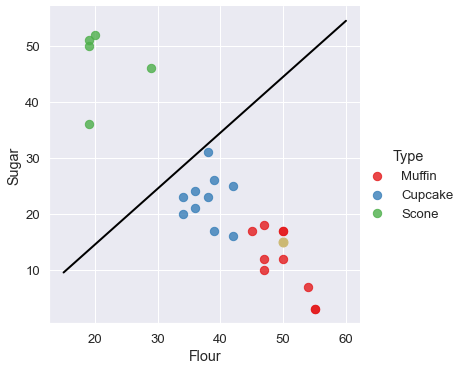

In [24]:
# Plot the point to visually see where the point lies
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(50, 15, 'yo', markersize='9');

In [12]:
# Predict if 40 parts flour and 20 parts sugar
muffin_or_cupcake_or_scone(40,20)

["You're looking at a Cupcake recipe!"]


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


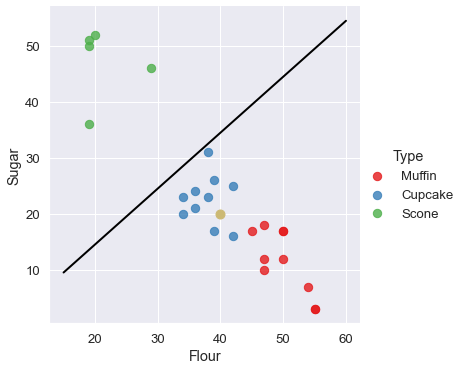

In [20]:
# Plot the point to visually see where the point lies
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(40, 20, 'yo', markersize='9');

In [21]:
# Predict if 40 parts flour and 20 parts sugar
muffin_or_cupcake_or_scone(20,45)

["You're looking at a Scone recipe!"]


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


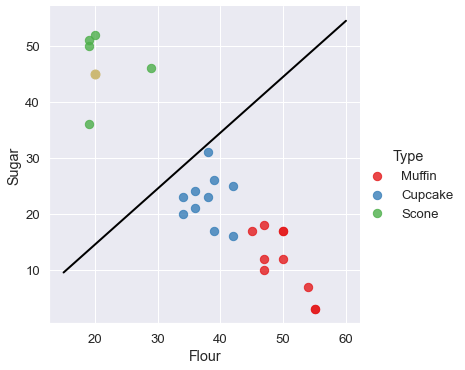

In [22]:
# Plot the point to visually see where the point lies
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(20, 45, 'yo', markersize='9');

__Classifying Using Decision Tree__

In [13]:
#Import libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image 
from pydot import graph_from_dot_data
from sklearn import tree

__Step 1:__ Bring in data

In [25]:
#Identify variables. We're using the same data file as for the SVM model


X = ingredients
y = type_label1

__Step 2:__ Create training and test sets

In [15]:
#Breakout testing/training data using stratify method

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify = y)

__Step 3:__ Fit the model

In [16]:
#Create the decision tree model

dt = DecisionTreeClassifier(max_depth=2, random_state=42)
dt.fit(X_train, y_train)
dt.predict(X_test)

array([2, 1, 0, 0, 0, 1, 1], dtype=int64)

__Step 4:__ Plot the results

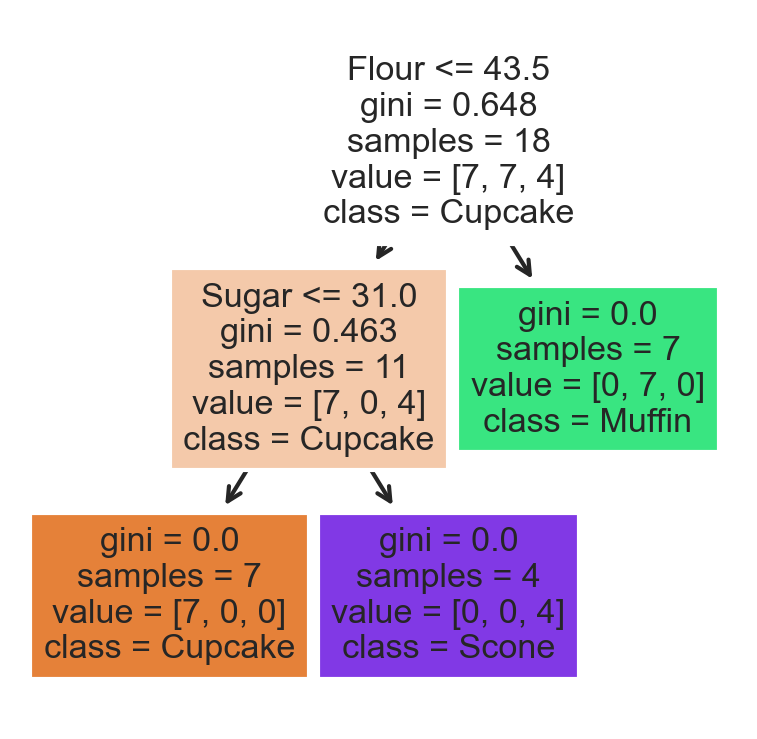

In [17]:
#Plot the tree

fn = ['Flour', 'Sugar']
cn = ['Cupcake', 'Muffin', 'Scone']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
tree.plot_tree(dt,
               feature_names = fn, 
               class_names=cn,
               filled = True);

__Step 5:__ Export results

In [18]:
#Import required library 

from sklearn.tree import export_graphviz

# Identify where to save the figures
path = "C:/Users/User/Documents/_DSBA_UNCC/DSBA_6156_Applied_Machine_Learning/images"
IMAGES_PATH = os.path.join(path)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def image_path(fig_id):
    return os.path.join(IMAGES_PATH, fig_id)

#Export tree

export_graphviz(
    dt,
    out_file='dt_baking.dot',
    feature_names=('Flour', 'Sugar'),
    class_names=cn,
    rounded=True,
    filled=True)